**2.1** 誤差関数と勾配降下法の考えを導入しアナログ値対応します。

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

**2.3** 活性化関数、出力の式、学習の式を修正します。

**2.3.1** シグモイド関数を作ってグラフを表示してみます。

In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

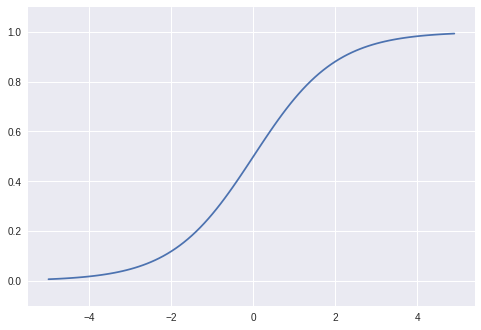

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [0]:
def dsigmoid(x):
    return x*(1 - x)

**2.3.2** 活性化関数と学習式の変更

In [0]:
def h(x):
    return sigmoid(x)

In [0]:
def dh(x):
    return dsigmoid(x)

In [0]:
''' 元のパーセプトロンの内容
def output_perceptron(w, x):
    s = 0.0
    for i in range(len(w)):
        s += w[i] * x[i]
    y = h(s - b)
    return y
'''
def output_perceptron(w, x):
    s = np.sum(w*x)
    y = h(s - b)
    return y

In [0]:
''' 元のパーセプトロンの内容
def train_perceptron(w, x, t):
    y = output_perceptron(w, x)
    for i in range(len(w)):
        dw = alpha*(t - y)*x[i]
        w[i] += dw
    square_error = np.square(t - y)
    return square_error
'''
def train_perceptron(w, x, t):
    o = output_perceptron(w, x)
    delta = alpha*(t - o)*dh(o);
    w += delta*x
    square_error = np.square(t - o)
    return square_error

In [0]:
def train_layer(neurons_w, data, teacher):
    square_error = 0.0
    for i in range(len(neurons_w)):
        square_error += train_perceptron(neurons_w[i], data, teacher[i])
    return square_error

In [0]:
def train_mnist(train_count):
    images, labels = mnist.train.next_batch(train_count)
    square_error = 0.0
    for i in range(len(images)):
        x = images[i]
        t = labels[i]
        square_error += train_layer(neurons_w, x, t)
    print(square_error/train_count/10) # 1ニューロンあたりの誤差

In [0]:
def test_mnist():
    images, labels = mnist.test.next_batch(1)
    x = images[0]
    t = labels[0]
    y = np.zeros(10)
    for i in range(len(neurons_w)):
        y[i] = output_perceptron(neurons_w[i], x)
    print(t)
    print(y)
    print(np.argmax(y))
    # イメージ表示
    fig = plt.figure(figsize=(8,4))
    plt.imshow(x.reshape((28,28)), vmin=0, vmax=1,cmap=plt.cm.gray_r, interpolation="nearest")

In [0]:
def test_mnist_error():
    test_count = 1000
    images, labels = mnist.test.next_batch(test_count)
    ng = 0
    for j in range(len(images)):
        x = images[j]
        t = labels[j]
        y = np.zeros(10)
        for i in range(len(neurons_w)):
            y[i] = output_perceptron(neurons_w[i], x)
        if np.argmax(t) != np.argmax(y):
            ng += 1
    print(ng / test_count)

In [13]:
neurons_w = np.random.rand(10, 28*28) * 0.1
b = 0.1
alpha = 0.01
train_mnist(1)

0.7892863429182151


In [14]:
train_mnist(100)

0.8706194252660664


In [15]:
train_mnist(1000)

0.293148498514207


In [16]:
alpha = 0.001
train_mnist(10000)

0.06451001102793881


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0.0328003  0.37021413 0.43199619 0.15424782 0.05538903 0.06386026
 0.2177147  0.05536953 0.08494174 0.04283749]
2


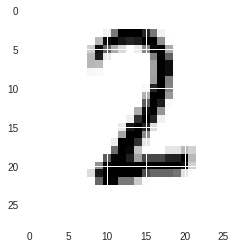

In [35]:
test_mnist()

In [23]:
test_mnist_error()

0.312


**2.4** バックプロパゲーションの実装

**2.4.1** クラス化

In [0]:
class Layer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size                           # 入力数
        self.output_size = output_size                         # ニューロン数と同じ
        self.w = (np.random.rand(output_size, input_size) - 0.5) * 0.1 # ニューロンごとに入力と同数の足がある分の重み
        self.b = (np.random.rand(output_size) - 0.5) * 0.2             # ニューロンごとのしきい値
    
    def h(self, x):
        return sigmoid(x)
    
    def dh(self, x):
        return dsigmoid(x)
    
    def output_neuron(self, W, b, X):
        s = np.sum(W*X)
        y = self.h(s - b)
        return y
    
    def train_neuron(self, W, b, X, T):
        O = self.output_neuron(W, b, X)
        d = -alpha*(T - O)*self.dh(O);
        W -= d*X
        return
    
    def output_layer(self, x):
        y = np.zeros(self.output_size)
        for i in range(self.output_size):
            y[i] = self.output_neuron(self.w[i], self.b[i], x)
        return y

    def train_layer(self, x, t):
        for i in range(self.output_size):
            self.train_neuron(self.w[i], self.b[i], x, t[i])
        return

In [0]:
layer1 = Layer(784, 10)
alpha = 0.1

def train_mnist(train_count):
    images, labels = mnist.train.next_batch(train_count)
    square_error = 0.0
    for i in range(len(images)):
        x = images[i]
        t = labels[i]
        y = layer1.output_layer(x)
        layer1.train_layer(x, t)
        square_error += calc_square_error(y, t)
    print(square_error/train_count/10) # 1ニューロンあたりの誤差

train_mnist(1)   

In [0]:
train_mnist(1000)

In [0]:
def test_mnist():
    images, labels = mnist.test.next_batch(1)
    x = images[0]
    t = labels[0]
    y = layer1.output_layer(x)
    print(t)
    print(y)
    print(np.argmax(y))
    # イメージ表示
    fig = plt.figure(figsize=(8,4))
    plt.imshow(x.reshape((28,28)), vmin=0, vmax=1,cmap=plt.cm.gray_r, interpolation="nearest")

In [0]:
test_mnist()

**2.4.1** ニューロンごとの誤差の元を保持する。

In [0]:
class Layer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size                           # 入力数
        self.output_size = output_size                         # ニューロン数と同じ
        self.neurons_W = (np.random.rand(output_size, input_size) - 0.5) * 0.1 # ニューロンごとに入力と同数の足がある分の重み
        self.neurons_b = (np.random.rand(output_size) - 0.5) * 0.2             # ニューロンごとのしきい値
        self.neurons_d = np.zeros(output_size)                                 # ニューロンごとの誤差修正値
    
    def h(self, x):
        return sigmoid(x)
        #return tanh(x)
        #return relu(x)
    
    def dh(self, y):
        return dsigmoid(y)
        #return dtanh(y)
        #return drelu(y)
    
    def output_layer(self, X):
        y = np.zeros(self.output_size)
        for i in range(self.output_size):
            # y = h(sum(W*X) - b)
            y[i] = self.h(np.sum(self.neurons_W[i]*X) - self.neurons_b[i])
        return y

    def train_layer(self, X):
        for i in range(self.output_size):
            # W = W - (-alpha*d*X)
            self.neurons_W[i] -= -alpha*self.neurons_d[i]*X
        return
    
    # 出力層での自分自身の誤差修正値をセット
    def backprop_layer_output(self, O, T):
        # d = (T - O)*dh(O)
        self.neurons_d = (T - O)*self.dh(O)
        return

    # 前のレイヤーへの誤差修正値を算出
    def backprop_layer(self):
        total_prev_D = np.zeros(self.input_size)
        for i in range(self.output_size):
            #total_prev_D += W*d
            total_prev_D += self.neurons_W[i]*self.neurons_d[i]
        return total_prev_D

    # 後のレイヤーで計算された誤差修正値に出力値を掛けて自レイヤーに値をセット
    def set_layer_d(self, D, O):
        # d = D*dh(O)
        self.neurons_d = D*self.dh(O)

In [0]:
layer1 = Layer(784, 10)
alpha = 0.01

def train_mnist(train_count):
    images, labels = mnist.train.next_batch(train_count)
    square_error = 0.0
    for i in range(len(images)):
        X = images[i]
        T = labels[i]
        Y = layer1.output_layer(X)
        layer1.backprop_layer_output(Y, T)
        layer1.train_layer(X)
        square_error += calc_square_error(Y, T)
    print(square_error/train_count/10) # 1ニューロンあたりの誤差

train_mnist(1)

In [0]:
alpha = 0.01
train_mnist(10000)

In [0]:
# ３層ネットワーク 784x100x10
layer1 = Layer(784, 100)
layer2 = Layer(100, 10)
alpha = 0.01
mini_batch = 100
epoch = 0
epochs, dpns = [], []

def output_backprop_mnist(X):
    # 正方向でニューロンの出力
    O1 = layer1.output_layer(X)
    Y  = layer2.output_layer(O1)
    return Y

def train_backprop_mnist(train_count):
    global layer1, layer2, epoch, epochs, dpns
    for count in range(train_count):
        images, labels = mnist.train.next_batch(mini_batch)
        square_error = 0.0
        for i in range(mini_batch):
            X = images[i]
            T = labels[i]
            # 正方向でニューロンの出力
            O1 = layer1.output_layer(X)
            Y  = layer2.output_layer(O1)
            # 逆伝搬で誤差修正値をニューロン毎に算出
            layer2.backprop_layer_output(Y, T)
            D1 = layer2.backprop_layer()
            layer1.set_layer_d(D1, O1)
            # 誤差修正値を使って学習
            layer2.train_layer(O1)
            layer1.train_layer(X)
            # 二乗誤差算出
            square_error += calc_square_error(Y, T)
        epoch += mini_batch
        dpn = square_error/mini_batch/10 # 1ニューロンあたりの誤差
        epochs.append(epoch)
        dpns.append(dpn)
    print("epoch:" + str(epoch) + " d/neuron:" + str(dpn))

train_backprop_mnist(1)

In [0]:
alpha = 0.01
train_backprop_mnist(100)

In [0]:
fig = plt.figure()
plt.plot(epochs, dpns)

In [0]:
def test_backprop_mnist():
    images, labels = mnist.test.next_batch(1)
    X = images[0]
    T = labels[0]
    Y = output_backprop_mnist(X)
    print(T)
    print(Y)
    print(np.argmax(Y))
    # イメージ表示
    fig = plt.figure(figsize=(8,4))
    plt.imshow(X.reshape((28,28)), vmin=0, vmax=1,cmap=plt.cm.gray_r, interpolation="nearest")

In [0]:
test_backprop_mnist()

In [0]:
def test_backprop_mnist_error():
    test_count = 1000
    images, labels = mnist.test.next_batch(test_count)
    ng = 0
    for j in range(len(images)):
        X = images[j]
        T = labels[j]
        Y = output_backprop_mnist(X)
        if np.argmax(T) != np.argmax(Y):
            ng += 1
            #print("T:" + str(np.argmax(T)) + " Y:" + str(np.argmax(Y)) + " NG!")
        #else:
            #print("T:" + str(np.argmax(T)) + " Y:" + str(np.argmax(Y)))
    print(ng / test_count)

In [0]:
test_backprop_mnist_error()

ディープラーニングの技術を試す

学習の高速化手法の変更（ローカルミニマム対策としても）
- SGD (素の確率的勾配降下法）
- Momentum
- AdaGrad

勾配消失問題への対応（活性化関数の変更）
- sigmoid
- tanh
- ReLU

In [0]:
def calc_square_error(O, T):
    return np.sum(np.square(O - T))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(y):
    return y*(1 - y)

def tanh(x):
    return np.tanh(x)

def dtanh(y):
    return 1 - np.square(np.tanh(y))

def relu(x):
    #return x if x > 0 else 0
    return x * (x > 0)

def drelu(y):
    #return 1 if y > 0 else 0
    return 1 * (y > 0)

In [0]:
class Layer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size                           # 入力数
        self.output_size = output_size                         # ニューロン数と同じ
        self.neurons_W = (np.random.rand(output_size, input_size) - 0.5) * 0.1 # ニューロンごとに入力と同数の足がある分の重み
        self.neurons_b = (np.random.rand(output_size) - 0.5) * 0.2             # ニューロンごとのしきい値
        self.neurons_d = np.zeros(output_size)                                 # ニューロンごとの誤差修正値
        self.neurons_P = np.zeros((output_size, input_size))                   # パラメータ更新の高速化用保持パラメータ

    def h(self, x):
        return sigmoid(x)
        #return tanh(x)
        #return relu(x)
    
    def dh(self, y):
        return dsigmoid(y)
        #return dtanh(y)
        #return drelu(y)
    
    def dw(self, i, X):
        #return self.sgd(i, X)
        return self.momentum(i, X)
        #return self.adagrad(i, X)
    
    def output_layer(self, X):
        y = np.zeros(self.output_size)
        for i in range(self.output_size):
            # y = h(sum(W*X) - b)
            y[i] = self.h(np.sum(self.neurons_W[i]*X) - self.neurons_b[i])
        return y

    def train_layer(self, X):
        for i in range(self.output_size):
            # W = W - (-alpha*d*X)
            #self.neurons_W[i] -= -alpha*self.neurons_d[i]*X
            # W = W - dw(d, X)
            self.neurons_W[i] -= self.dw(i, X)
        return
    
    # 出力層での自分自身の誤差修正値をセット
    def backprop_layer_output(self, O, T):
        # d = (T - O)*dh(O)
        self.neurons_d = (T - O)*self.dh(O)
        return

    # 前のレイヤーへの誤差修正値を算出
    def backprop_layer(self):
        total_prev_D = np.zeros(self.input_size)
        for i in range(self.output_size):
            #total_prev_D += W*d
            total_prev_D += self.neurons_W[i]*self.neurons_d[i]
        return total_prev_D

    # 後のレイヤーで計算された誤差修正値に出力値を掛けて自レイヤーに値をセット
    def set_layer_d(self, D, O):
        # d = D*dh(O)
        self.neurons_d = D*self.dh(O)

    # 学習の高速化比較
    def sgd(self, i, X):
        # W = W - alpha*d*X
        return -alpha*self.neurons_d[i]*X

    def momentum(self, i, X):
        # v = momentum*v - alpha*d*X
        # W = W + v
        momentum = 0.9
        self.neurons_P[i] = momentum*self.neurons_P[i] - alpha*self.neurons_d[i]*X
        return self.neurons_P[i]

    def adagrad(self, i, X):
        # h = h + (d*X)*(d*X)
        # W = W - alpha*(1/sqrt(h))*d*X
        self.neurons_P[i] += (self.neurons_d[i]*X)*(self.neurons_d[i]*X)
        return -alpha*self.neurons_d[i]*X/(np.sqrt(self.neurons_P[i]) + 1e-7)

In [0]:
# ３層ネットワーク 784x100x10
layer1 = Layer(784, 100)
layer2 = Layer(100, 10)
alpha = 0.01
mini_batch = 100
epoch = 0
epochs, dpns = [], []

def output_backprop_mnist(X):
    # 正方向でニューロンの出力
    O1 = layer1.output_layer(X)
    Y  = layer2.output_layer(O1)
    return Y

def train_backprop_mnist(train_count):
    global layer1, layer2, epoch, epochs, dpns
    for count in range(train_count):
        images, labels = mnist.train.next_batch(mini_batch)
        square_error = 0.0
        for i in range(mini_batch):
            X = images[i]
            T = labels[i]
            # 正方向でニューロンの出力
            O1 = layer1.output_layer(X)
            Y  = layer2.output_layer(O1)
            # 逆伝搬で誤差修正値をニューロン毎に算出
            layer2.backprop_layer_output(Y, T)
            D1 = layer2.backprop_layer()
            layer1.set_layer_d(D1, O1)
            # 誤差修正値を使って学習
            layer2.train_layer(O1)
            layer1.train_layer(X)
            # 二乗誤差算出
            square_error += calc_square_error(Y, T)
        epoch += mini_batch
        dpn = square_error/mini_batch/10 # 1ニューロンあたりの誤差
        epochs.append(epoch)
        dpns.append(dpn)
    print("epoch:" + str(epoch) + " d/neuron:" + str(dpn))

train_backprop_mnist(1)

In [0]:
alpha = 0.01
train_backprop_mnist(100)

In [0]:
fig = plt.figure()
plt.plot(epochs, dpns)

In [0]:
dpns_sigmoid_sgd = dpns

In [0]:
dpns_sigmoid_momentum = dpns

In [0]:
dpns_sigmoid_adagrad = dpns

In [0]:
fig = plt.figure()
plt.plot(epochs, dpns_sigmoid_sgd)
plt.plot(epochs, dpns_sigmoid_momentum)
plt.plot(epochs, dpns_sigmoid_adagrad)

多層でも学習が収束するための手法（ローカルミニマム対策）
- PreTraining（事前学習）
- DropOut
- バッチ正規化

In [0]:
# ６層ネットワーク 784x160x80x40x20x10
layer1 = Layer(784, 160)
layer2 = Layer(160, 80)
layer3 = Layer(80,  40)
layer4 = Layer(40,  20)
layer5 = Layer(20,  10)
alpha = 0.01
mini_batch = 100
epoch = 0
epochs, dpns = [], []

def output_backprop_mnist(X):
    # 正方向でニューロンの出力
    O1 = layer1.output_layer(X)
    O2 = layer2.output_layer(O1)
    O3 = layer3.output_layer(O2)
    O4 = layer4.output_layer(O3)
    Y  = layer5.output_layer(O4)
    return Y

def train_backprop_mnist(train_count):
    global layer1, layer2, layer3, layer4, layer5, epoch, epochs, dpns
    for count in range(train_count):
        images, labels = mnist.train.next_batch(mini_batch)
        square_error = 0.0
        for i in range(mini_batch):
            X = images[i]
            T = labels[i]
            # 正方向でニューロンの出力
            O1 = layer1.output_layer(X)
            O2 = layer2.output_layer(O1)
            O3 = layer3.output_layer(O2)
            O4 = layer4.output_layer(O3)
            Y  = layer5.output_layer(O4)
            # 逆伝搬で誤差修正値をニューロン毎に算出
            layer5.backprop_layer_output(Y, T)
            D4 = layer5.backprop_layer()
            layer4.set_layer_d(D4, O4)
            D3 = layer4.backprop_layer()
            layer3.set_layer_d(D3, O3)
            D2 = layer3.backprop_layer()
            layer2.set_layer_d(D2, O2)
            D1 = layer2.backprop_layer()
            layer1.set_layer_d(D1, O1)
            # 誤差修正値を使って学習
            layer5.train_layer(O4)
            layer4.train_layer(O3)
            layer3.train_layer(O2)
            layer2.train_layer(O1)
            layer1.train_layer(X)
            # 二乗誤差算出
            square_error += calc_square_error(Y, T)
        epoch += mini_batch
        dpn = square_error/mini_batch/10 # 1ニューロンあたりの誤差
        epochs.append(epoch)
        dpns.append(dpn)
    print("epoch:" + str(epoch) + " d/neuron:" + str(dpn))

train_backprop_mnist(1)

In [0]:
train_backprop_mnist(200)

活性化関数と重みの変更方法を変えてそれぞれ算出してグラフにしてみる

In [0]:
dpns_6layer_sigmoid_sgd = dpns

In [0]:
dpns_6layer_sigmoid_momentum = dpns

In [0]:
dpns_6layer_tanh_sgd = dpns

In [0]:
dpns_6layer_tanh_momentum = dpns

In [0]:
dpns_6layer_relu_momentum = dpns

In [0]:
fig = plt.figure()
plt.plot(epochs, dpns_6layer_sigmoid_sgd, label="sigmoid_sgd")
plt.plot(epochs, dpns_6layer_sigmoid_momentum, label="sigmoid_momentum")
plt.plot(epochs, dpns_6layer_tanh_sgd, label="tanh_sgd")
plt.plot(epochs, dpns_6layer_tanh_momentum, label="tanh_momentum")
plt.plot(epochs, dpns_6layer_relu_momentum, label="relu_momentum")
plt.legend()

PreTraining

In [0]:
def smaller(image):
    def seri(x, y):
        return y*28 + x

    simages = np.zeros(14*14)
    for i in range(14):
        for j in range(14):
            x, y = j*2, i*2
            avg = (image[seri(x+0, y+0)] + image[seri(x+0, y+1)] + image[seri(x+1, y+0)] + image[seri(x+1, y+1)])/4.0
            simages[i*14 + j] = avg
    return simages

In [0]:
# PreTraining ６層ネットワーク 784x160x80x40x20x10
#layer1 = Layer(196, 100) # 14x14 (28x28の1/4)
#layer2 = Layer(100, 60)
#layer3 = Layer(60,  40)
#layer4 = Layer(40,  20)
#layer5 = Layer(20,  10)
# 元に戻すためのレイヤー
#layer1r = Layer(100, 196)
#layer2r = Layer(60, 100)
#layer3r = Layer(40, 60)
#layer4r = Layer(20, 40)
#layer5r = Layer(10, 20)
alpha = 0.01
mini_batch = 100
epoch = 0
epochs, dpns = [], []

def output_pretrain_mnist(X):
    # 正方向でニューロンの出力
    O1 = layer1.output_layer(X)
    O2 = layer2.output_layer(O1)
    O3 = layer3.output_layer(O2)
    O4 = layer4.output_layer(O3)
    Y  = layer5.output_layer(O4)
#    O5 = layer5.output_layer(O4)
#    Y  = layer5r.output_layer(O5)
    return Y

def train_pretrain_mnist(train_count):
    global layer1, layer2, layer3, layer4, layer5, epoch, epochs, dpns
    global layer1r, layer2r, layer3r, layer4r, layer5r
    for count in range(train_count):
        images, labels = mnist.train.next_batch(mini_batch)
        square_error = 0.0
        for i in range(mini_batch):
            X = smaller(images[i])
            T = labels[i]
            # 正方向でニューロンの出力
            O1 = layer1.output_layer(X)
            O2 = layer2.output_layer(O1)
            O3 = layer3.output_layer(O2)
            O4 = layer4.output_layer(O3)
            Y  = layer5.output_layer(O4)
            #O5 = layer5.output_layer(O4)
            #Y  = layer5r.output_layer(O5)
            # 逆伝搬で誤差修正値をニューロン毎に算出
            layer5.backprop_layer_output(Y, T)
            D4 = layer5.backprop_layer()
            layer4.set_layer_d(D4, O4)
            D3 = layer4.backprop_layer()
            layer3.set_layer_d(D3, O3)
            D2 = layer3.backprop_layer()
            layer2.set_layer_d(D2, O2)
            D1 = layer2.backprop_layer()
            layer1.set_layer_d(D1, O1)
            #layer5r.backprop_layer_output(Y, O4)
            #D = layer5r.backprop_layer()
            #layer5.set_layer_d(D, O5)
            # 誤差修正値を使って学習
            layer5.train_layer(O4)
            layer4.train_layer(O3)
            layer3.train_layer(O2)
            layer2.train_layer(O1)
            layer1.train_layer(X)
            #layer5r.train_layer(O5)
            #layer5.train_layer(O4)
            # 二乗誤差算出
            square_error += calc_square_error(Y, T)
#            square_error += calc_square_error(Y, O4)
        epoch += mini_batch
        dpn = square_error/mini_batch/10 # 1ニューロンあたりの誤差
        epochs.append(epoch)
        dpns.append(dpn)
        print("epoch:" + str(epoch) + " d/neuron:" + str(dpn))
    print("epoch:" + str(epoch) + " d/neuron:" + str(dpn))

def test_pretrain():
    images, labels = mnist.test.next_batch(1)
    X = smaller(images[0])
    T = labels[0]
    Y = output_pretrain_mnist(X)
    # イメージ表示
    #fig = plt.figure(figsize=(8,4))
    fig, (figL, figR) = plt.subplots(ncols=2, figsize=(8,4))
    figL.imshow(X.reshape((14,14)), vmin=0, vmax=1,cmap=plt.cm.gray_r, interpolation="nearest")
    figR.imshow(Y.reshape((14,14)), vmin=0, vmax=1,cmap=plt.cm.gray_r, interpolation="nearest")

train_pretrain_mnist(1)

In [0]:
train_pretrain_mnist(100)

In [0]:
test_pretrain()

In [0]:
def test_pretrain_mnist():
    images, labels = mnist.test.next_batch(1)
    X = smaller(images[0])
    T = labels[0]
    Y = output_pretrain_mnist(X)
    print(T)
    print(Y)
    print(np.argmax(Y))
    # イメージ表示
    fig = plt.figure(figsize=(8,4))
    plt.imshow(X.reshape((14,14)), vmin=0, vmax=1,cmap=plt.cm.gray_r, interpolation="nearest")

In [0]:
test_pretrain_mnist()

In [0]:
def test_pretrain_mnist_error():
    test_count = 1000
    images, labels = mnist.test.next_batch(test_count)
    ng = 0
    for j in range(len(images)):
        X = smaller(images[j])
        T = labels[j]
        Y = output_pretrain_mnist(X)
        if np.argmax(T) != np.argmax(Y):
            ng += 1
            #print("T:" + str(np.argmax(T)) + " Y:" + str(np.argmax(Y)) + " NG!")
        #else:
            #print("T:" + str(np.argmax(T)) + " Y:" + str(np.argmax(Y)))
    print(ng / test_count)

In [0]:
test_pretrain_mnist_error()

XORの学習

In [0]:
data_xor    = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
teacher_xor = np.array([[0.2],  [0.8],  [0.8],  [0.2]])

# ３層ネットワーク 2x4x1
layer1 = Layer(2, 4)
layer2 = Layer(4, 1)
alpha = 0.05
mini_batch = 1
epoch = 0
epochs, dpns = [], []


def output_backprop_xor(X):
    # 正方向でニューロンの出力
    O1 = layer1.output_layer(X)
    Y  = layer2.output_layer(O1)
    return Y

def train_backprop_xor(train_count):
    global layer1, layer2, epoch, epochs, dpns
    for count in range(train_count):
        square_error = 0.0
        for batch_i in range(mini_batch):
            i = np.random.randint(4)
            X = data_xor[i]
            T = teacher_xor[i]
            # 正方向でニューロンの出力
            O1 = layer1.output_layer(X)
            Y  = layer2.output_layer(O1)
            # 逆伝搬で誤差修正値をニューロン毎に算出
            layer2.backprop_layer_output(Y, T)
            D1 = layer2.backprop_layer()
            layer1.set_layer_d(D1, O1)
            # 誤差修正値を使って学習
            layer2.train_layer(O1)
            layer1.train_layer(X)
            # 二乗誤差算出
            square_error += calc_square_error(Y, T)
        epoch += mini_batch
        dpn = square_error/mini_batch/1 # 1ニューロンあたりの誤差
        epochs.append(epoch)
        dpns.append(dpn)
    print("epoch:" + str(epoch) + " d/neuron:" + str(dpn))

def test_backprop_xor():
    for i in range(4):
        X = data_xor[i]
        T = teacher_xor[i]
        Y = output_backprop_xor(X)
        print("X:" + str(X) + " Y:" + str(Y) + " T:" + str(T))

train_backprop_xor(1)

In [0]:
train_backprop_xor(1000)

In [0]:
test_backprop_xor()

In [0]:
a = np.array([[1, 2], [3, 4]])
def test2(x):
    test1(x[0])
def test1(x):
    #x = x + np.array([2, 3])
    x += np.array([2, 3])
test2(a)

In [0]:
a